In [7]:
import pandas as pd
import numpy as np

In [11]:
die = pd.Series([1, 2, 3, 4, 5, 6])
samp_5 = die.sample(5, replace=True)
print(samp_5)
np.mean(samp_5)

4    5
3    4
3    4
5    6
5    6
dtype: int64


np.float64(5.0)

In [ ]:
samples_means = []
for i in range(1000):  # Augmenté à 1000 pour mieux démontrer le TCL
    samp_5 = die.sample(5, replace=True)
    samples_means.append(np.mean(samp_5))
samples_means


[np.float64(2.6),
 np.float64(3.4),
 np.float64(2.8),
 np.float64(2.8),
 np.float64(2.0),
 np.float64(3.2),
 np.float64(2.6),
 np.float64(3.2),
 np.float64(3.4),
 np.float64(3.0)]

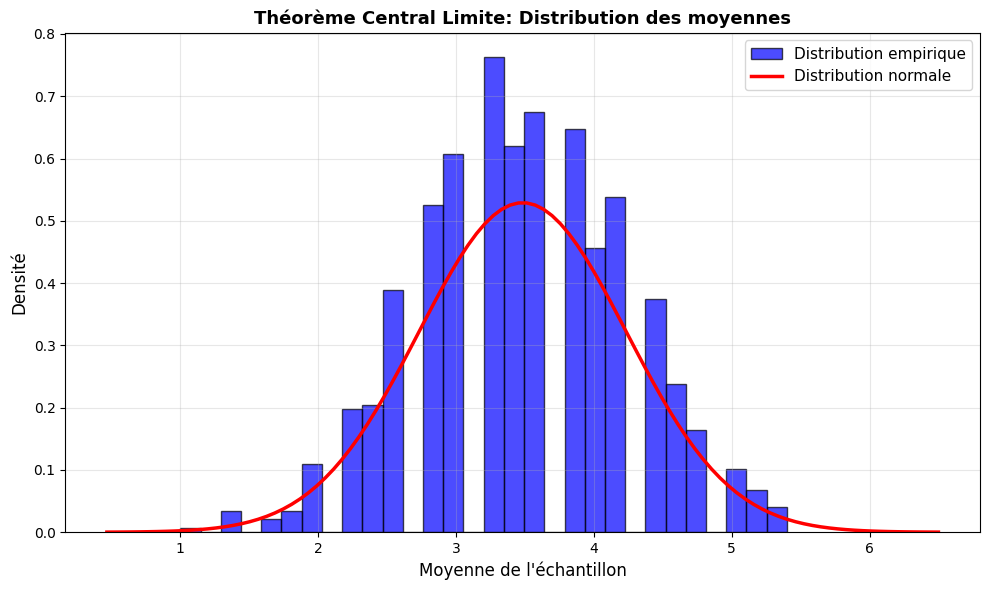

In [ ]:
# Augmenter le nombre d'échantillons pour mieux voir le TCL
samples_means = []
for i in range(1000):
    samp_5 = die.sample(5, replace=True)
    samples_means.append(np.mean(samp_5))

# Bar chart avec nombre d'occurrences
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Créer les bins et compter les occurrences
counts, bins = np.histogram(samples_means, bins=30)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.bar(bin_centers, counts, width=np.diff(bins)[0], alpha=0.7, color='blue', edgecolor='black', label='Occurrences')

# Courbe normale théorique (théorème central limite) - ajustée à l'échelle des occurrences
mu = np.mean(samples_means)
sigma = np.std(samples_means)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
# Ajuster la courbe pour correspondre à l'échelle des occurrences
curve_y = stats.norm.pdf(x, mu, sigma) * len(samples_means) * np.diff(bins)[0]
plt.plot(x, curve_y, 'r-', linewidth=2.5, label='Distribution normale théorique')

plt.xlabel('Moyenne de l\'échantillon', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)
plt.title('Théorème Central Limite: Distribution des moyennes', fontsize=13, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
